In [1]:
from DataLoader import load_data
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import re
import ast

In [4]:
df = pd.read_csv('train_dataset.csv')
def clean_bbox(bbox_str):
    clean_str = re.sub(r'[^\d,.]', '', bbox_str)
    bbox = tuple(map(float, clean_str.split(',')))
    return bbox

df['bbox'] = df['bbox'].apply(clean_bbox)

masked_images, images, masks, labels = load_data(df)
labels = labels - 1  

Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png
Failed to load image at Dataset-20240319T181738Z-001/Dataset/PineNutsSeedXrays/Pine Nuts/21_HECOC8_PN_P22.png


In [5]:
masked_images.shape

(352, 256, 256, 3)

In [6]:
print(np.unique(masks)) 


[  0. 255.]


In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(masked_images, labels, test_size=0.2, random_state=42)

history = model.fit(
    x=masked_images, 
    y=labels,
    batch_size=32,
    epochs=10,
    validation_split=0.2
)


Epoch 1/10
9/9 [==============================] - 83s 9s/step - loss: 0.5352 - accuracy: 0.7758 - val_loss: 0.6572 - val_accuracy: 0.8028
Epoch 2/10
9/9 [==============================] - 104s 12s/step - loss: 0.4610 - accuracy: 0.8612 - val_loss: 0.5138 - val_accuracy: 0.8028
Epoch 3/10
9/9 [==============================] - 106s 12s/step - loss: 0.4336 - accuracy: 0.8577 - val_loss: 0.5081 - val_accuracy: 0.8028
Epoch 4/10
9/9 [==============================] - 105s 12s/step - loss: 0.4107 - accuracy: 0.8612 - val_loss: 0.5554 - val_accuracy: 0.8028
Epoch 5/10
9/9 [==============================] - 111s 13s/step - loss: 0.4253 - accuracy: 0.8612 - val_loss: 0.5131 - val_accuracy: 0.8028
Epoch 6/10
9/9 [==============================] - 114s 13s/step - loss: 0.4215 - accuracy: 0.8612 - val_loss: 0.5186 - val_accuracy: 0.8028
Epoch 7/10
9/9 [==============================] - 122s 14s/step - loss: 0.4196 - accuracy: 0.8612 - val_loss: 0.5223 - val_accuracy: 0.8028
Epoch 8/10
9/9 [======

In [11]:
model.save('BaseModel')  

INFO:tensorflow:Assets written to: BaseModel\assets


INFO:tensorflow:Assets written to: BaseModel\assets


In [12]:
# Extracting accuracy and loss history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


In [13]:
import matplotlib.pyplot as plt

def plot_learning_curves(acc, val_acc, loss, val_loss, title='Model Learning Curve'):
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'ro-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.suptitle(title)
    plt.show()


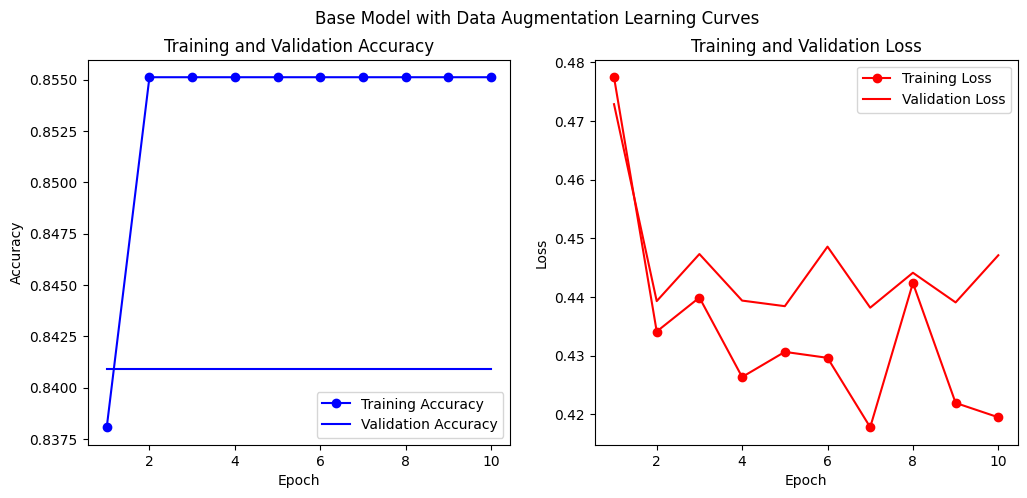

In [14]:
plot_learning_curves(acc, val_acc, loss, val_loss, 'Base Model with Data Augmentation Learning Curves')
